#Математические пакеты.
#Лабораторная работа 1: Основы ЦОС
Выполнил студент группы 9381, Игнашов Вадим

##Цель работы
Изучить возможности библиотек Python для решения цифровых задач обработки сигналов.

##Задачи
1. Освоить Jupyter Notebook.
2. Выполнить загрузку аудио сигнала и построить огибающую (график).
3. Фильтрация (выбрать один из 4 типов фильтров). Получить фильтрованный сигнал.
4. Детектор сигнал/шум. Получить сигнал после детектирования.
5. Эффект "Эхо". Получить сигнал после работы аудио-эффекта.
6. **Бонусное задание**: эффект Distortion (классический вариант). Получить сигнал после работы аудио-эффекта.

##Теоретические положения
###Фильтрация
Имеется сигнал $x(i),i=0,1,...,N-1$. Хотим построить огибающую $y(j),j=0,1,...,n-1$.
Пусть $m=[{N\over n}]$ - число точек в интервале усреднения (порядок фильтра). Тогда $y(j)={1\over m}\sum\limits_{k=mj}^{mj+m-1}|x(k)|$.

Основные типы фильтров: нижних частот (ФНЧ), верхних частот (ФВЧ), полосовой (ПФ), режекторный (РФ).

**Фильтр нижних частот (ФНЧ)** — эффективно пропускает частотный спектр сигнала ниже некоторой частоты (частоты среза) и подавляет частоты сигнала выше этой частоты. От нулевой частоты до частоты среза ФНЧ находится полоса частот пропускания, справа - полоса частот подавления.

**Фильтр верхних частот (ФВЧ)** - пропускает высокие частоты входного сигнала, при этом подавляя частоты сигнала ниже частоты среза.

**Полосовой фильтр (ПФ)** - пропускает составляющие, находящиеся в некоторой полосе частот.

**Режекторный фильтр (РФ)** - не пропускающий колебания некоторой определённой полосы частот и пропускающий колебания с частотами, выходящими за пределы этой полосы.

###Пример ФНЧ фильтрации
Пусть $F_d$ - частота дискретизации, $F_s$ - частота среза, $m$ - порядок фильтра. Тогда вычисляем: $wn=2{F_s\over F_d}$, где $wn$ - относительная частота среза.
###Амплитудный детектор сигнал/шум
Определяем среднее сигнала по амплитуде (без учёта знака): $mid={{\sum\limits_{k=0}^{N-1}{|x(k)|}}\over N}$

Определяем порог детектора - $Th=\alpha * mid$, где $0<\alpha<1$ подбирается экспериментально. Задаём величину "провала" (в отсчётах) - $k$. Обозначим $y(i)$ - сигнал после детектирования.
###Эхо (простейший ревербератор)
Ревербератор реализован, как набор линий задержки. Число линий задержки $N_L>8$. Каждая линия задержки имеет свой весовой коэффициент (задается пользователем): $\alpha_1 > \alpha_2 > ... > \alpha_{N_L}$
Перед добавлением к исходному сигналу, выход ревербератора фильтруется ФНЧ-фильтром первого порядка.
Желаемое соотношение между ”сухим”и обработанным сигналом задается коэффициентом применимости $\gamma$.

Ревербератор может работать в двух режимах: ручной и с использованием готовой конфигурации (preset). Для ручного режима регулируется пользователем задается максимальная задержка $D_1$, а величины остальных определяются автоматически через нее:
$D_i = D_{1}2{{1-i}\over N_L}, i=2,...,N_L$.
Для готовой конфигурации пользователь вручную задает последовательность $D_1 > D_2 > ... > D_{N_L}$.

Начальное значение $D_1$ определяется геометрией помещения, и является расстоянием, пройденным звуком (скорость 335 м/сек) от точки излучения до ближайшего препятствия.

Пример: Допустим, частота дискретизации сигнала 48000 Гц, до ближайшей стены — 10 метров. Звук пройдет это расстояние за ${10\over 335} =$ 0.02985 секунд. Тогда задержка $D_1$ составит 48000 ∗ 0.02985 = 1433 отсчета сигнала.
###Класический Distortion
Обозначим входной сигнал и выходной сигналы, соответственно как $x(i)$ и $y(i), i = 0,1, . . . ,N − 1$. Пользователь задает порог— $Th$ и максимальное значение сигнала $Max &gt; Th$. Тогда
$$\begin{equation*}
Y(i) = 
 \begin{cases}
   x(i) ,при \text{$|x(i)|\leq Th$}\\
   Max * sign(x(i)) ,при \text{$|x(i)|>Th$}
 \end{cases}
\end{equation*}$$

##Выполнение лабораторной работы

###Загрузка аудио сигнала и построение огибающей

Подключим все необходимые пакеты, считаем в переменную `audio` аудио сигнал и проиграем его

In [1]:
from scipy import signal
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import wave
import math

audio = '03-01-05-01-01-01-06_A6.wav'
ipd.Audio(audio)


В переменную `audioOpened` считываем wav-файл, его параметры в следующие переменные:

`nch` - число каналов

`width` - число байт

`framerate` - частота дискретизации

`nf` - число фреймов

`typecomp` - тип сжатия

`name` - имя типа сжатия

После чего считываем все фреймы в `content`, сопоставляем типы данных `numpy` с возможным размером сэмпла и создаем массив из байтовой строки.
Определяем длительность потока в переменную `time`, распределяем фрэймы по времени в переменной `t_arr`

In [2]:
audioOpened = wave.open(audio, mode="r")

(nch, width, framerate, nf, typecomp, name) = audioOpened.getparams() 
content = audioOpened.readframes(nf)

types = {1: np.int8, 2: np.int16, 4: np.int32}
content = np.fromstring(content, dtype=types[width])

time = nf / framerate
t_arr = np.linspace(0, len(content) / framerate, num=len(content))

C:\Users\imsol\AppData\Local\Temp/ipykernel_20436/2330448618.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  content = np.fromstring(content, dtype=types[width])


Далее, в переменную `m` записываем количество точек усреднения. 

Данные для огибающей запишем в массив env и отобразим результат на графике

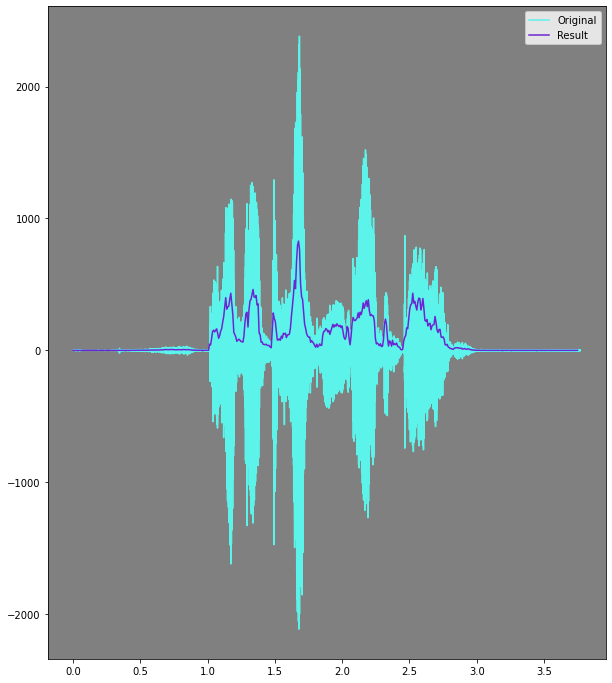

In [3]:
m = math.floor(len(content)/500)

env = []
for i in range(500):
    sum = 0
    for j in range(m*i, m*i+m-1):
        sum += abs(content[j])
    env.append(sum/m)
    

plt.figure(figsize=(10, 12))
ax = plt.axes()
ax.set_facecolor("gray")
plt.plot(t_arr, content, c = '#5cf3ea')

content2 = np.linspace(0, 3.75, num=len(env))
plt.plot(content2, env, c = '#6c25d2')
plt.legend(("Original","Result"))


###Фильтрация

В переменную `hzm` определим частоту среза

`x1` и `x2` - вектора коэффициентов фильтра (числителя и знаменателя соответственно)

`content3` - отфильтрованный сигнал

`content3_wav` - сигнал для записи

Результат отобразим в виде графика и выведем в файл `result_filt.wav`

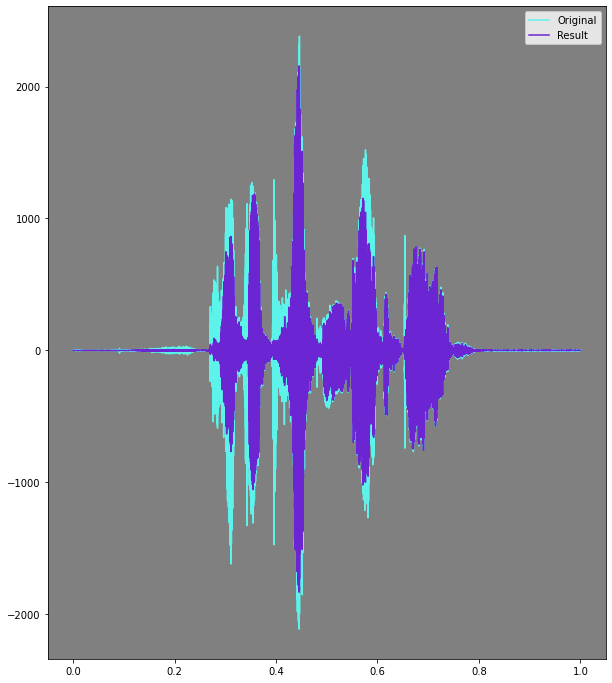

In [4]:
hzm = 2000
wn = 2 * (hzm / framerate)

x1, x2 = signal.butter(5, wn, "lowpass")
content3 = signal.filtfilt(x1, x2, content)
arr = np.linspace(0, 1, len(content))

plt.figure(figsize=(10, 12))
ax = plt.axes()
ax.set_facecolor("gray")
plt.plot(arr, content, c = '#5cf3ea')
plt.plot(arr, content3, c = '#6c25d2')
plt.legend(("Original","Result"))

content3_wav = np.asarray(content3, dtype=types[width])
wavfile.write("result_filt.wav", framerate, content3_wav)
ipd.Audio("result_filt.wav")

###Детектор сигнал/шум

`mid` - среднее значение сигнала по амплитуде

`a` - alpha

`rift` - порог детектора

`k` - величина провала

Результат отобразим в виде графика и выведем в файл `result_detect.wav`

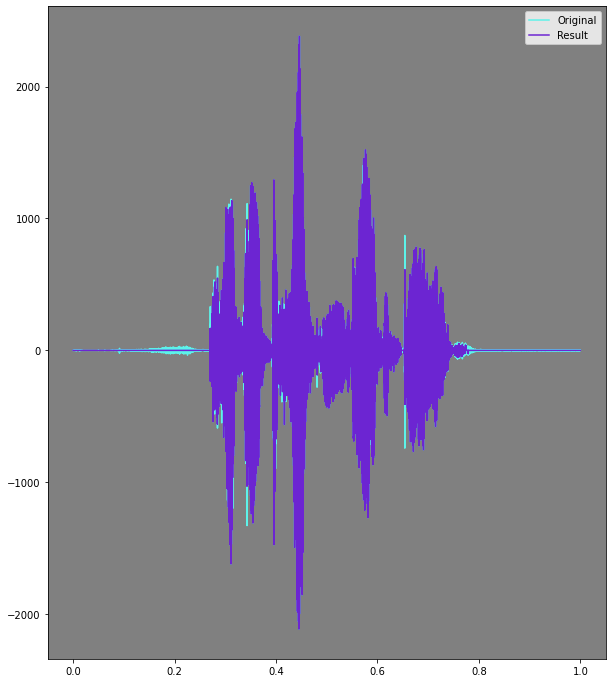

In [5]:
sum = 0
for i in range(len(content)):
    sum += abs(content[i])
    
mid = sum/len(content)
a = 0.2
rift = a * mid
k = 10

n = 0
res = [0]*len(content)

for i in range(len(content)):
    if abs(content[i]) > rift:
        n += 1
        if n >= k:
            res[i] = content[i]
    else:
        n = 0
        
arr = np.linspace(0,1,len(content))

plt.figure(figsize=(10, 12))
ax = plt.axes()
ax.set_facecolor("gray")
plt.plot(arr, content, c = '#5cf3ea')
plt.plot(arr, res, c = '#6c25d2')
plt.legend(("Original","Result"))

res = np.asarray(res, dtype=types[width])
wavfile.write("result_detect.wav", framerate, res)        
ipd.Audio("result_detect.wav")

###Эхо (простейший ревербератор)

`nlines` - кол-во линий задержки

`lines` - линии задержки

`g` - коэффициент применимости

`v` - скорость звука (335м/с)

`x` - количество метров до стены (м)

`dist` - расстояние

`a` - весовые коэффициенты lines (0,9; 0,8 ... 0,1)

In [6]:
nlines = 9
lines = [0]*nlines
g = 0.95
v = 335
x = input("Input metres: ")
dist = float(x)/v

lines[0] = dist

a = []
for i in range(9,0,-1):
    a.append(i/10)

for i in range(1, nlines):
    lines[i] = lines[0] * (2 ** ((-i)/nlines))

content4 = [0]*(int((np.sum(lines) + len(content) / framerate + 1) * framerate))
for i in range(len(content)-1):
    n = 0
    for j in range(nlines):
        n+=lines[j]   
        content4[i+int(n*framerate)] += content[i] * a[j]   
       
hzm = 1000
wn = 2 * hzm / framerate
x1, x2 = signal.butter(5, wn, "lowpass")
content4_echo = signal.filtfilt(x1, x2, content4)*g

for i in range(len(content)):
    content4_echo[i]+=content[i]
content4_echo = np.asarray(content4_echo, dtype=types[width])    
wavfile.write("result_echo.wav", framerate, content4_echo)
ipd.Audio("result_echo.wav")

Input metres: 5


###Классический Distortion

`rift` - порог

`max` - максимальная сигнал

`res` - результат

Результат отобразим в виде графика и выведем в файл `result_distortion.wav`

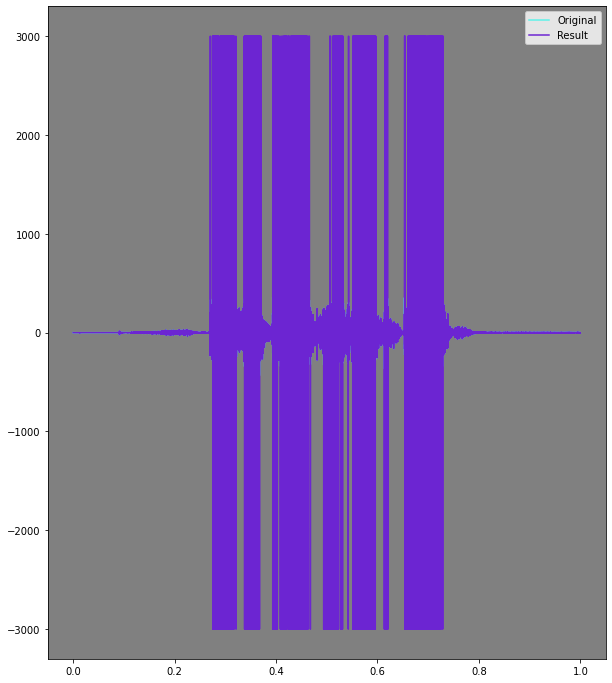

In [7]:
rift = 300 
max = 3000
res = [0]*len(content)

for i in range(len(content)):
    x = content[i]
    if (abs(x) < rift):
        res[i] = x
    else:
        res[i] = max * np.sign(x)
        
arr = np.linspace(0,1,len(content))

plt.figure(figsize=(10, 12))
ax = plt.axes()
ax.set_facecolor("gray")
plt.plot(arr, content, c = '#5cf3ea')
plt.plot(arr, res, c = '#6c25d2')
plt.legend(("Original","Result"))

res = np.asarray(res, dtype=types[width])
wavfile.write("result_distortion.wav", framerate, res)        
ipd.Audio("result_distortion.wav")

##Выводы
Была выполнена лабораторная работа, по итогу которой были получены знания по использованию пакетов языка Python для решения цифровых задач обработки звуковых сигналов, таких как scipy, IPython.display, wave. Также, были изучены способы взаимодействия с wav-файлами и построением графиков.

Решения задач ЦОС были следующие:

1. Фильтрация сигнала
2. Детектирование сигнал/шум
3. Наложение эффекта "Эхо"
4. Наложение эффекта "Distortion"